## Квадратичные сплайны

$\textbf{Квадратичный сплайн}$ (дефекта 1), интерполирующий $f(x)$ на $[a, b]$: $$c(x) := c_k + b_k (x-x_k) + a_k (x-x_k)^2 ,$$ 

где $x\in [x_{k-1}, x_{k}] \big|_{k=1}^n$

$\textbf{Обозначение квадратичного сплайна дефекта 1}$: $S^n_{2,1}$, где $n, 2, 1$ - кол-во узлов интерполирования, старшая степень и порядок гладкости сплайна соответственно.

In [432]:
import numpy as np
import matplotlib.pyplot as plt 
np.set_printoptions(suppress=True) # чтобы оч маленькие значения печатались в виде нулей

In [433]:
# Исходная функция
def fn(x):
    return x**2 + 4*np.sin(x) - 2 

## По $m$ равноотстоящим узлам

In [434]:
a = float(input('Введите левую границу a: '))
b = float(input('Введите правую границу b: '))
m = int(input('Введите кол-во равноотстоящих узлов m (целое число): '))

Введите левую границу a: -10
Введите правую границу b: 10
Введите кол-во равноотстоящих узлов m (целое число): 1000


In [435]:
x = np.linspace(a, b, m)
# n - число квадратичных сплайнов, у каждого 3 неизвестных - значит, у нас 3*n неизвестных
# Надо решить 3*n уравнения
n = m - 1

# AB = C
A = np.zeros((3*n, 3*n))
C = np.zeros(3*n)

for i in range(n):
    A[i, i] = x[i]**2
    A[i, n+i] = x[i]
    A[i, 2*n+i] = 1

    # Строки [n, 2n-1]
    A[n+i, i] = x[i+1]**2
    A[n+i, n+i] = x[i+1]
    A[n+i, 2*n+i] = 1

    C[i] = fn(x[i])
    C[n+i] = fn(x[i+1])

# Строки [2n, 3n-1]
for j in range(n-1): 
    row = 2*n+j
    columns = [j, j+1, n+j, n+j+1]
    values = 2*x[j+1], -2*x[j+1], 1, -1
    A[row, columns] = values

# В последней строке задаем a_1 = 1    
A[3*n-1, 0] = 1

# Решаем относительно b
B = np.linalg.solve(A,C)
ai = B[:n]
bi = B[n:2*n]
ci = B[2*n:]

## Изобразим квадратичный сплайн по $m$ равноотстоящим узлам

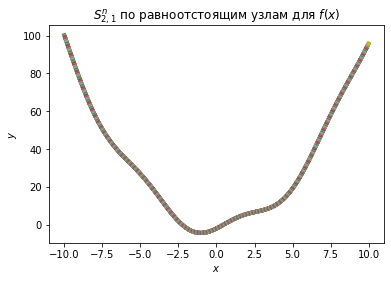

In [436]:
plt.figure()
for k in range(n):
    xspline = np.linspace(x[k], x[k+1])
    yspline = ai[k]*xspline**2 + bi[k]*xspline + ci[k]
    plt.plot(xspline, yspline, '-', linewidth=4)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$S_{2,1}^n$ по равноотстоящим узлам для $f(x)$')
plt.show()

## Функция для вычисления значений с помощью $S_{2,1}^n$

In [437]:
def quadratic_spline(arg):
    flag = 0
    res = 0
    # Нахождение нужного участка интервала с помощью цикла
    for i in range(n):
        if (arg >= x[i]) and (arg <= x[i+1]):
            flag = i
            res = ai[flag]*arg**2 + bi[flag]*arg + ci[flag]
    return res

In [438]:
quadratic_spline(-9)

77.35152751879951

## Оптимальные узлы Чебышева $$x_i = 0.5 \left((b-a)\cos\dfrac{(2i+1)\pi}{2(n+1)} + (b+a)\right),\; i\in \overline{0,n}$$

In [439]:
# оптимальные узлы Чебышева
chebish = []
for i in range(0, m):
    chebish.append(0.5 * ((b-a)*np.cos(((2*i+1)*np.pi)/(2*(m+1))) + (b+a)))

In [440]:
# n - число квадратичных сплайнов по узлам Чебышева, у каждого 3 неизвестных - значит, у нас 3*n неизвестных
# Надо решить 3*n уравнения
n = m - 1

# A_opt * B_opt = C_opt
A_opt = np.zeros((3*n, 3*n))*1.0
C_opt = np.zeros(3*n)*1.0

for i in range(n):
    A_opt[i, i] = chebish[i]**2
    A_opt[i, n+i] = chebish[i]
    A_opt[i, 2*n+i] = 1
    
    # Строки [n, 2n-1]
    A_opt[n+i, i] = chebish[i+1]**2
    A_opt[n+i, n+i] = chebish[i+1]
    A_opt[n+i, 2*n+i] = 1
    
    C_opt[i] = fn(chebish[i])
    C_opt[n+i] = fn(chebish[i+1])
    
# Строки [2n, 3n-1]
for j in range(n-1): 
    A_opt[2*n+j, [j, j+1, n+j, n+j+1]] = 2*chebish[j+1], -2*chebish[j+1], 1, -1

# В последней строке задаем a_1 = 1    
A_opt[3*n-1, 0] = 1

# Решаем относительно b
B_opt = np.linalg.solve(A_opt, C_opt)
ai_opt = B_opt[:n]
bi_opt = B_opt[n:2*n]
ci_opt = B_opt[2*n:]

## Изобразим квадратичный сплайн по $m$ узлам Чебышева

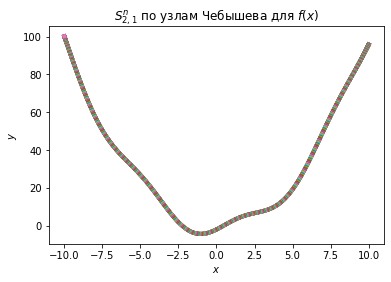

In [441]:
plt.figure()

for k in range(n):
    xspline_opt = np.linspace(chebish[k], chebish[k+1])
    yspline_opt = ai_opt[k]*xspline_opt**2 + bi_opt[k]*xspline_opt + ci_opt[k]
    plt.plot(xspline_opt, yspline_opt, '-', linewidth=4)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$S_{2,1}^n$ по узлам Чебышева для $f(x)$')
plt.show()

## Функция для вычисления значений с помощью $S_{2,1}^{n_{opt}}$

In [442]:
def optimal_quadratic_spline(arg):
    flag_opt = 0
    res = 0
    # Нахождение нужного участка интервала с помощью цикла
    for i in range(n):
        if (arg <= chebish[i]) and (arg >= chebish[i+1]):
            flag_opt = i
            res = ai_opt[flag_opt]*arg**2 + bi_opt[flag_opt]*arg + ci_opt[flag_opt]
    return res

In [443]:
optimal_quadratic_spline(-9)

77.35152645095663

## Найдем максимальные отклонения $RS_{2,1}^n, RS_{2,1}^{n_{opt}}$

In [447]:
k = int(input('Введите количество k точек разбиения интервала интерполирования, в которых определяются отклонения: '))
max_nodes = int(input('Введите максимальное количество max_nodes узлов: '))
# mds = maximum_difference_segment
mds = np.linspace(a, b, k)

func_mds = []
spline_mds = []
optimal_spline_mds = []
RSn_mp = []
RSn_opt_mp = []

# значения точной функции в точках x0, x1, ..., xm; m >> n
for i in mds:
    func_mds.append(fn(i))

print('Таблица 1:')
print('-----------------------------------------------------------------------------------------------------------')
print('| кол-во узлов, n | кол-во точек разбиения, k   | max RSn_mp \t\t | max RSn_opt_mp \t\t|' )
print('-----------------------------------------------------------------------------------------------------------')

for pp in range(3, max_nodes + 1):
    #---------------------------------------------------------------------------
    # SPLINE, создаем сплайны по равноотстоящим узлам
    #---------------------------------------------------------------------------
    # n - число квадратичных сплайнов
    n = pp - 1
    xx = np.linspace(a, b, pp)
    A = np.zeros((3*n, 3*n))
    C = np.zeros(3*n)
    for i in range(n):
        A[i, i] = xx[i]**2
        A[i, n+i] = xx[i]
        A[i, 2*n+i] = 1
        
        # Строки [n, 2n-1]
        A[n+i, i] = xx[i+1]**2
        A[n+i, n+i] = xx[i+1]
        A[n+i, 2*n+i] = 1

        C[i] = fn(xx[i])
        C[n+i] = fn(xx[i+1])
    # Строки [2n, 3n-1]
    for j in range(n-1): 
        A[2*n+j, [j, j+1, n+j, n+j+1]] = 2*xx[j+1], -2*xx[j+1], 1, -1
    # В последней строке задаем a_1 = 1    
    A[3*n-1, 0] = 1
    # Решаем относительно b
    B = np.linalg.solve(A,C)
    ai = B[:n]
    bi = B[n:2*n]
    ci = B[2*n:]
    
    #---------------------------------------------------------------------------
    # SPLINE_optimal, создаем сплайны по узлам Чебышева
    #---------------------------------------------------------------------------
    chebish = []
    for i in range(0, pp):
        chebish.append(0.5 * ((b-a)*np.cos(((2*i+1)*np.pi)/(2*(pp+1))) + (b+a)))

    n = pp - 1
    A_opt = np.zeros((3*n, 3*n))*1.0
    C_opt = np.zeros(3*n)*1.0

    for i in range(n):
        A_opt[i, i] = chebish[i]**2
        A_opt[i, n+i] = chebish[i]
        A_opt[i, 2*n+i] = 1

        # Строки [n, 2n-1]
        A_opt[n+i, i] = chebish[i+1]**2
        A_opt[n+i, n+i] = chebish[i+1]
        A_opt[n+i, 2*n+i] = 1

        C_opt[i] = fn(chebish[i])
        C_opt[n+i] = fn(chebish[i+1])

    # Строки [2n, 3n-1]
    for j in range(n-1): 
        A_opt[2*n+j, [j, j+1, n+j, n+j+1]] = 2*chebish[j+1], -2*chebish[j+1], 1, -1

    # В последней строке задаем a_1 = 1    
    A_opt[3*n-1, 0] = 1

    # Решаем относительно b
    B_opt = np.linalg.solve(A_opt, C_opt)
    ai_opt = B_opt[:n]
    bi_opt = B_opt[n:2*n]
    ci_opt = B_opt[2*n:]
    
    #---------------------------------------------------------------------------
    # Ищем отклонения     
    #---------------------------------------------------------------------------

    for p in mds:
        # значения квадр. сплайна S_{2,1}^n в точках x0, x1, ..., xk; k >> n   
        spline_mds.append(quadratic_spline(p))
        # значения квадр. сплайна S_{2,1}^{n_opt} в точках x0, x1, ..., xk; k >> n        
        optimal_spline_mds.append(optimal_quadratic_spline(p))
            
    # отклонения
    for j in range(1, len(mds)):
        RSn_mp.append(np.absolute(func_mds[j] - spline_mds[j]))
        RSn_opt_mp.append(np.absolute(func_mds[j] - optimal_spline_mds[j]))
    RSn_mp_max = max(RSn_mp)
    RSn_opt_mp_max = max(RSn_opt_mp)
    
    print('|\t', pp, '\t|\t\t', k, '\t  |', RSn_mp_max, '\t|', RSn_opt_mp_max, '\t\t |')
    print('-----------------------------------------------------------------------------------------------------------')
    RSn_mp = []
    RSn_opt_mp = []
    RSn_mp_max, RSn_opt_mp_max = 0, 0
    spline_mds = []
    optimal_spline_mds = []

Введите количество k точек разбиения интервала интерполирования, в которых определяются отклонения: 900
Введите максимальное количество max_nodes узлов: 250
Таблица 1:
-----------------------------------------------------------------------------------------------------------
| кол-во узлов, n | кол-во точек разбиения, k   | max RSn_mp 		 | max RSn_opt_mp 		|
-----------------------------------------------------------------------------------------------------------
|	 3 	|		 900 	  | 199.40344499177456 	| 99.65644113004176 		 |
-----------------------------------------------------------------------------------------------------------
|	 4 	|		 900 	  | 263.83285249264304 	| 99.65644113004176 		 |
-----------------------------------------------------------------------------------------------------------
|	 5 	|		 900 	  | 286.92873855052517 	| 99.65644113004176 		 |
-----------------------------------------------------------------------------------------------------------
|	 6 	|		 900 	

|	 54 	|		 900 	  | 610.7375997209066 	| 99.65644113004176 		 |
-----------------------------------------------------------------------------------------------------------
|	 55 	|		 900 	  | 631.7559203853564 	| 99.65644113004176 		 |
-----------------------------------------------------------------------------------------------------------
|	 56 	|		 900 	  | 617.2652301482465 	| 99.65644113004176 		 |
-----------------------------------------------------------------------------------------------------------
|	 57 	|		 900 	  | 620.7952278969115 	| 99.65644113004176 		 |
-----------------------------------------------------------------------------------------------------------
|	 58 	|		 900 	  | 620.9225295145036 	| 99.65644113004176 		 |
-----------------------------------------------------------------------------------------------------------
|	 59 	|		 900 	  | 606.0047384138114 	| 99.65644113004176 		 |
----------------------------------------------------------------------------

|	 104 	|		 900 	  | 522.8483047648803 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 105 	|		 900 	  | 523.8265808872235 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 106 	|		 900 	  | 516.5471755989716 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 107 	|		 900 	  | 521.046406969884 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 108 	|		 900 	  | 511.2944189587396 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 109 	|		 900 	  | 517.4351453097814 	| 95.82391555644251 		 |
-----------------------------------------------------------------------

|	 152 	|		 900 	  | 457.9819862716708 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 153 	|		 900 	  | 453.02923319206286 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 154 	|		 900 	  | 455.35144495035655 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 155 	|		 900 	  | 451.4928035492297 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 156 	|		 900 	  | 452.37748392383185 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 157 	|		 900 	  | 450.0507543060147 	| 95.82391555644251 		 |
-------------------------------------------------------------------

|	 201 	|		 900 	  | 402.66604622576943 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 202 	|		 900 	  | 400.5451963147684 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 203 	|		 900 	  | 400.94944147104604 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 204 	|		 900 	  | 401.4167789652005 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 205 	|		 900 	  | 400.9183998182139 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
|	 206 	|		 900 	  | 398.90877282464356 	| 95.82391555644251 		 |
-------------------------------------------------------------------

|	 250 	|		 900 	  | 362.1396935916471 	| 95.82391555644251 		 |
-----------------------------------------------------------------------------------------------------------
